<a href="https://colab.research.google.com/github/Sofia-dsc/Otros_TP/blob/main/P1_Sof%C3%ADa_Rold%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial 1**
## **Estadística y exploración de datos**
## Alumna: Sofía Roldán Varela

### 1. Sea una población de 10,000 personas cuyas edades se distribuyen de manera no normal, con una media de 35 años y una desviación estándar de 12 años.
### a. Si extraemos muestras aleatorias de 50 personas cada una, ¿cuál será la distribución aproximada de las medias muestrales?
### b. ¿Cuál es la probabilidad de que la media de una muestra aleatoria de 50 personas sea menor de 32 años?


In [ ]:
# Importo las librerías que vaya a necesitar
import pandas as pd
import numpy as np

In [ ]:
# Defino los parámetros con los datos que nos da el problema
n_personas= 10000
media_poblacion= 35
desviacion_poblacion= 12

In [ ]:
# Para generar datos utilizo log-normal que genera una distribución asimétrica, las edades se distribuyen de manera no normal
mu = np.log((media_poblacion**2) / np.sqrt(desviacion_poblacion**2 + media_poblacion**2))
sigma = np.sqrt(np.log(1 + (desviacion_poblacion**2 / media_poblacion**2)))

# Genero las edades
data_edades = np.random.lognormal(mu, sigma, n_personas)
data_edades = np.clip(data_edades, 0, None).astype(int)

In [ ]:
# Creo un dataframe para visualizar los datos
df_edades = pd.DataFrame(data_edades, columns=['Edad'])

In [ ]:
df_edades

,Edad
0,19
1,35
2,54
3,47
4,44
...,...
9995,50
9996,37
9997,37
9998,34


# a)

In [ ]:
## Primero comienzo calculando la desviación estandard de las medias muestrales
# Defino parámetros
n_muestra = 50  # Tamaño de la muestra
num_muestras = 500
desviacion_estandar = 12  # De la población

In [ ]:
desv_estandar = desviacion_estandar / np.sqrt(n_muestra)
print("Error estándar:", desv_estandar)

Error estándar: 1.697056274847714


In [ ]:
# Almaceno las medias
medias_muestrales = []
for _ in range(num_muestras):
    muestra = np.random.choice(data_edades, size=n_muestra)
    medias_muestrales.append(np.mean(muestra))


In [ ]:
medias_muestrales

[33.26,
 34.88,
 33.0,
 35.58,
 34.96,
 34.64,
 36.96,
 32.92,
 36.52,
 33.66,
 36.6,
 33.98,
 31.66,
 34.76,
 34.64,
 33.74,
 33.36,
 33.58,
 35.02,
 32.66,
 36.96,
 33.92,
 33.34,
 38.24,
 33.06,
 33.42,
 34.38,
 34.42,
 35.36,
 36.16,
 35.98,
 37.16,
 34.14,
 34.26,
 35.56,
 32.76,
 35.42,
 34.44,
 32.72,
 33.92,
 35.34,
 35.56,
 36.56,
 33.34,
 35.3,
 35.32,
 31.4,
 33.74,
 33.54,
 34.26,
 35.54,
 34.2,
 32.36,
 32.84,
 37.76,
 31.88,
 32.74,
 33.94,
 34.62,
 34.72,
 34.42,
 35.94,
 35.16,
 36.14,
 34.68,
 34.9,
 35.52,
 33.14,
 35.3,
 32.74,
 33.36,
 35.36,
 39.32,
 34.02,
 34.98,
 35.34,
 31.74,
 32.78,
 35.48,
 34.56,
 33.16,
 33.4,
 34.78,
 33.34,
 34.48,
 37.44,
 34.16,
 35.38,
 34.66,
 35.4,
 35.46,
 36.3,
 33.38,
 32.68,
 32.52,
 33.22,
 33.58,
 36.36,
 39.18,
 34.76,
 36.06,
 34.2,
 32.72,
 33.98,
 35.3,
 35.62,
 37.08,
 38.88,
 33.92,
 33.68,
 37.02,
 32.46,
 31.08,
 34.72,
 33.4,
 34.58,
 34.18,
 34.94,
 32.5,
 32.64,
 38.06,
 32.1,
 34.48,
 34.42,
 35.08,
 34.6,
 36.4,
 

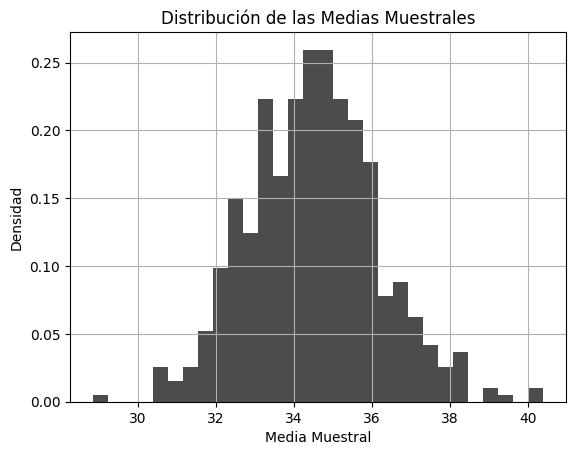

In [ ]:
# Grafico para visualizar la distribución aproximada de las medias
import matplotlib.pyplot as plt

plt.hist(medias_muestrales, bins=30, alpha=0.7, color='black', density=True)
plt.title('Distribución de las Medias Muestrales')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.grid()
plt.show()

 ## --> Según el Teorema del Límite Central la distribución de las medias muestrales tiende a ser normal a medida que el tamaño de la muestra aumenta (en este caso 50).

# b)

In [ ]:
from scipy.stats import norm #función de distribución acumulativa de la distribución normal para encontrar la probabilidad

In [ ]:
# Defino parámetros
media_poblacion= 35
desviacion_poblacion= 12
n_muestra = 50

In [ ]:
# Calculo desviación estandar
desv_estandar = desviacion_poblacion / np.sqrt(n_muestra)

In [ ]:
# Calculo la probabilidad de que la media muestral sea menor que 32
probabilidad = norm.cdf(32, loc=media_poblacion, scale=desv_estandar)
print("Probabilidad de que la media muestral sea menor que 32:", probabilidad)

Probabilidad de que la media muestral sea menor que 32: 0.03854993587177085


#### La probabilidad de que la media de una muestra aleatoria de 50 personas sea menor de 32 años es de: 0.0385

## 2. Se desea estimar la altura promedio de los árboles en un bosque, con un margen de error de 5 centímetros y un nivel de confianza del 99%. Se sabe que la desviación estándar de las alturas de los árboles en ese bosque es de 10 centímetros. ¿Cuál es el tamaño de muestra mínimo necesario? Responde de manera completa.


In [ ]:
import scipy.stats as stats

In [ ]:
# Defino los datos del problema
sigma = 10
e = 5
alpha = 0.01

In [ ]:
# Calculo el valor crítico Z
z = stats.norm.ppf(1 - alpha/2)

In [ ]:
# Calculo el tamaño de muestra
tamaño_muestra = (z* sigma / e)**2

In [ ]:
print("El tamaño de muestra mínimo necesario es:", round(tamaño_muestra))

El tamaño de muestra mínimo necesario es: 27


####  El tamaño de muestra mínimo necesario para estimar la altura promedio de los árboles en el bosque, con un margen de error de 5 centímetros y un nivel de confianza del 99%, es de 27 árboles. Al medir al menos 27 árboles, se puede asegurar al 99% de que la estimación de la altura promedio de los árboles no se alejará más de 5 cm de la verdadera media.

## 3. Se desea estimar el peso promedio de los paquetes enviados por una empresa de paquetería, con un margen de error de 0.5 kilogramos y un nivel de confianza del 99%. Se sabe que la desviación estándar de los pesos de los paquetes es de 1.2 kilogramos y que la empresa envía aproximadamente 5000 paquetes por día. ¿Cuál es el tamaño de muestra mínimo necesario para realizar **este** estudio? Responde de manera completa.

In [ ]:
# Defino los parámetros del problema
envios = 5000
sigma = 1.2
e = 0.5
alpha = 0.01

In [ ]:
# Calculo el valor crítico Z
z = stats.norm.ppf(1 - alpha/2)

In [ ]:
# Calculo el tamaño de muestra
tamaño_muestra = (envios * z**2 * sigma**2) / (e**2 * (envios-1) + z**2 * sigma**2)

In [ ]:
print("El tamaño de muestra mínimo necesario para realizar este estudio es:", round(tamaño_muestra))

El tamaño de muestra mínimo necesario para realizar este estudio es: 38


#### Al medir al menos 38 paquetes, la empresa puede estar segura al 99% de que su estimación del peso promedio de los paquetes no se alejará más de 0.5 kg de la verdadera media. Dado que la empresa envía aproximadamente 5000 paquetes por día, un tamaño de muestra de 38 es factible para obtener una estimación precisa.

## 4. Una organización sin fines de lucro se dedica a recolectar donaciones de alimentos no perecederos para distribuirlos a familias necesitadas. En una campaña reciente, se recolectaron datos sobre el peso (en kilogramos) de cada donación. Se desea estimar el peso promedio de las donaciones con un intervalo de confianza del 95% y realizar una prueba de hipótesis para determinar si el peso promedio es superior a 5 kilogramos.

In [ ]:
# Generar 1000 datos aleatorios de peso entre 1 y 10 kilogramos
pesos = np.random.uniform(1, 10, 1000)
# Crear un DataFrame de pandas
df = pd.DataFrame({'Peso': pesos})

In [ ]:
df.head()

,Peso
0,3.950503
1,9.929343
2,6.271341
3,1.180697
4,2.504846


####  Para este ejercico necesito calcular el intervalo de confianza para el peso promedio de las donaciones y realizar una prueba de hipótesis para determinar si el peso promedio es superior a 5 kilogramos.

In [ ]:
# Calculo la media y la desviación estándar
media = np.mean(pesos)
desviacion_estandar = np.std(pesos)
tamaño_muestra = len(pesos)

In [ ]:
# Ahora calculo el intervalo de confianza
z = 1.96  # valor crítico para 95%
margen_error = z * (desviacion_estandar / np.sqrt(tamaño_muestra))
intervalo_confianza = (media - margen_error, media + margen_error)
print(f"Intervalo de confianza del 95%: {intervalo_confianza}")

Intervalo de confianza del 95%: (5.471234967913823, 5.794804356461022)


In [ ]:
# Genero mi prueba de hipótesis
valor_hipotesis_nula = 5
t_statistic = (media - valor_hipotesis_nula) / (desviacion_estandar / np.sqrt(tamaño_muestra))
df = tamaño_muestra - 1

In [ ]:
# Calculo el valor p
valor_p = 1 - stats.t.cdf(t_statistic, df)
print(f"Valor p: {valor_p}")

Valor p: 2.0539125955565396e-14


In [ ]:
# Comparo el valor_p con el nivel de significancia para tomar una decisión.
alpha = 0.05
if valor_p < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para afirmar que el peso promedio es superior a 5 kg.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que el peso promedio es superior a 5 kg.")

Se rechaza la hipótesis nula. Hay evidencia suficiente para afirmar que el peso promedio es superior a 5 kg.


In [ ]:
# Para ver el peso promedio de las donaciones con un intervalo de confianza del 95 calculo los límites del intervalo de confianza
limite_inferior = media - margen_error
limite_superior = media + margen_error
print(f"El peso promedio de las donaciones con un intervalo de confianza del 95% es entre {limite_inferior:.2f} kg y {limite_superior:.2f} kg.")
print(f"Peso promedio de las donaciones: {media:.2f} kg")

El peso promedio de las donaciones con un intervalo de confianza del 95% es entre 5.47 kg y 5.79 kg.
Peso promedio de las donaciones: 5.63 kg


### Con la resolución de este ejercicio puedo estimar que el el peso promedio de las donaciones con un intervalo de confianza del 95% es de **5.63 kg**. Al realizar la prueba de hipótesis pude determinar que el peso promedio si es superior a 5 kilogramos.